## PyTorch를 이용한 데이터 가공 예시

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

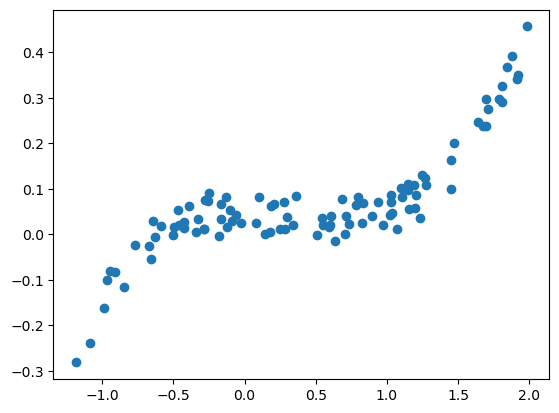

In [9]:
# 우리가 맞출 데이터
x = np.random.uniform(-1.2,2,size=(100))
y = 0.1*x**3-0.1*x**2+0.1*np.random.uniform(size=(100))
plt.plot(x,y,'o')

In [10]:
# train_validation_test분류
data = np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=-1)
print(data.shape) # 차원0: 데이터개수, 차원1: (x,y)
np.random.shuffle(data)

test_num = int(data.shape[0]*0.1)
valid_num = int(data.shape[0]*0.1)
train_num = data.shape[0]-valid_num-test_num

train_data = data[:train_num]
valid_data = data[train_num:train_num+valid_num]
test_data = data[train_num+valid_num:]

(100, 2)


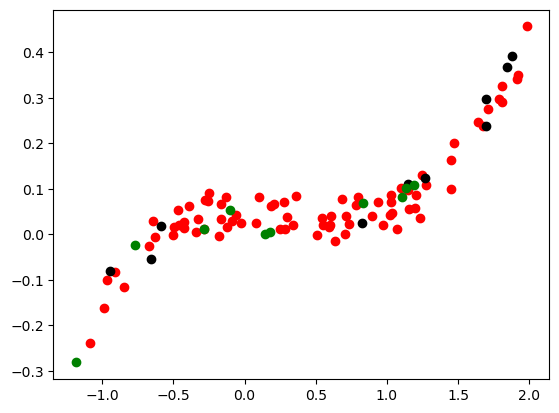

In [11]:
plt.plot(train_data[:,0],train_data[:,1],'ro',)
plt.plot(valid_data[:,0],valid_data[:,1],'ko')
plt.plot(test_data[:,0],test_data[:,1],'go')

In [12]:
# torch batch
class dataset(torch.utils.data.Dataset):
  def __init__(self,data):
    self.data = data
    # self.xx = self.data[:,0]
    # print(self.xx)
    self.x = self.data[:,0].reshape(-1,1)
    # print(self.x)
    self.y = self.data[:,1].reshape(-1,1)

  def __getitem__(self,idx):
    return torch.Tensor(self.x[idx]),torch.Tensor(np.array(self.y[idx]))

  def __len__(self):
    return len(self.data)

In [13]:
train_dataset = dataset(train_data)
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=32,shuffle=True,drop_last=False) # drop_last 난는 배기 버리냐.

In [14]:
for X,Y in train_loader:
  print(X.shape)
  print(Y.shape)
  break

torch.Size([32, 1])
torch.Size([32, 1])
